In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/steam-reviews-2021/steam_reviews.csv


In [2]:
import matplotlib.pyplot as plt

In [3]:
dataset = pd.read_csv("/kaggle/input/steam-reviews-2021/steam_reviews.csv")

In [4]:
# for now its here easy access
dataset[dataset.isnull().any(axis=1)]

,Unnamed: 0,app_id,app_name,review_id,language,review,timestamp_created,timestamp_updated,recommended,votes_helpful,...,steam_purchase,received_for_free,written_during_early_access,author.steamid,author.num_games_owned,author.num_reviews,author.playtime_forever,author.playtime_last_two_weeks,author.playtime_at_review,author.last_played
32,32,292030,The Witcher 3: Wild Hunt,85176661,brazilian,NaN,1611367193,1611367193,True,0,...,True,False,False,76561198076880796,127,13,875.0,752.0,826.0,1.611370e+09
116,116,292030,The Witcher 3: Wild Hunt,85157446,polish,NaN,1611339816,1611339816,True,0,...,True,False,False,76561199076516208,24,5,570.0,262.0,570.0,1.611346e+09
234,234,292030,The Witcher 3: Wild Hunt,85137051,schinese,NaN,1611313850,1611313850,True,0,...,True,False,False,76561199072705966,38,2,1138.0,150.0,1138.0,1.611314e+09
653,653,292030,The Witcher 3: Wild Hunt,85054410,turkish,NaN,1611177970,1611177970,True,0,...,True,False,False,76561198079854448,17,1,2262.0,1364.0,2019.0,1.611356e+09
700,700,292030,The Witcher 3: Wild Hunt,85046235,schinese,NaN,1611167047,1611167047,True,0,...,True,False,False,76561198448988124,14,2,1140.0,349.0,1140.0,1.610851e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21742475,21742480,546560,Half-Life: Alyx,65683010,english,NaN,1585027384,1585027384,True,0,...,True,False,False,76561198330773895,40,5,523.0,0.0,251.0,1.593096e+09
21743370,21743375,546560,Half-Life: Alyx,65674271,english,NaN,1585016526,1585016526,True,0,...,True,True,False,76561198063579350,118,6,1538.0,0.0,445.0,1.585196e+09
21744390,21744395,546560,Half-Life: Alyx,65665688,english,NaN,1585006608,1585006608,True,0,...,True,False,False,76561198332117675,104,14,1368.0,0.0,309.0,1.585254e+09
21745382,21745387,546560,Half-Life: Alyx,65659679,polish,NaN,1585000242,1585000242,True,0,...,True,False,False,76561198351070263,59,5,831.0,0.0,103.0,1.590777e+09


**Bonus
Beyond just looking at the numerical ratings, the words users write in their reviews give us valuable insights into how they feel about the application. Let's analyze these review texts using sentiment analysis.**

Perform sentiment analysis on the review texts in the top 3 languages and classify them as positive, negative, or neutral.
What is the distribution of sentiment across all reviews?
Does the sentiment analysis align with whether the application is recommended or not? Explain any insights from this comparison.
Is there a correlation between the sentiment of a review and the number of helpfulness votes it receives? Provide an analysis of the results and discuss potential trends.

We lacked device to handle 21747371 data. So we were forced to deal with only 3000 data taken from top 3 langugaes and this sample was choosen randomly. 

In [5]:
!pip install pandas langdetect deep-translator transformers torch
import pandas as pd
from deep_translator import GoogleTranslator # to translate other languages to english
from transformers import pipeline # we used pretrained model roberta for sentiment detection considering mixed and nutral labels as one single, and rest are same


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 19.4 MB/s eta 0:00:0000:01
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 kB 2.0 MB/s eta 0:00:00
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993227 sha256=2c13004f3900986561e952d753c55511cada09f5c98cad10f47c11abec5a5925
  Stored in directory: /root/.cache/pip/wheels/95/03/7d/59ea870c70ce4e5a370638b5462a7711ab78fba2f655d05106
Successfully built langdetect


In [7]:
from transformers import pipeline

# RoBERTa model 
roberta_pipeline = pipeline("sentiment-analysis", model="cardiffnlp/twitter-roberta-base-sentiment")




config.json:   0%|          | 0.00/747 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/499M [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

/opt/conda/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:1617: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be deprecated in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [8]:
# demo to check if it works in kaggle
# text = "neutral"
# result = roberta_pipeline(text)
# print(result)

In [9]:

def translate_to_english(text):
    try:
        return GoogleTranslator(source='auto', target='en').translate(text)
    except:
        return text  # Return original text if translation fails





In [10]:
import re

In [11]:
# 1stly we devided the text into chunks of 200 size becuase roberta has limitation but  it is fast and more accurate. 
# we did the average to find which sentiment should we choose for a review and the most count of sentiment we can find
def analyze_sentiment(text, max_tokens=512, chunk_size=200):
    text = str(text)
    text = re.sub(r'[^A-Za-z0-9 ]+', '', text)
    
    label_counts = {'positive': 0, 'negative': 0, 'neutral': 0}
    score_sums = {'positive': 0.0, 'negative': 0.0, 'neutral': 0.0}
    total_chunks = 0

    
    chunks = [text[i:i + chunk_size] for i in range(0, len(text), chunk_size)]

    for chunk in chunks:
        try:
            result = roberta_pipeline(chunk[:max_tokens])
            label = result[0]['label']
            score = result[0]['score']

            # roberta has default value of LABEL_0 - LABEL_3 
            if label == "LABEL_2":  # Positive 
                label_counts['positive'] += 1
                score_sums['positive'] += score
            elif label == "LABEL_0":  # Negative
                label_counts['negative'] += 1
                score_sums['negative'] += score
            else:  # Neutral (also has mixed=LABEL_3 in it)
                label_counts['neutral'] += 1
                score_sums['neutral'] += score

            total_chunks += 1

        except Exception as e:
            print(f"Sentiment analysis error on chunk: {chunk} | Error: {e}")

    #average
    average_scores = {}
    for label in label_counts:
        if label_counts[label] > 0:
            average_scores[label] = score_sums[label] / label_counts[label]
        else:
            average_scores[label] = 0.0

    #the most frequent sentiment because we devided the whole text into chucks
    most_frequent_label = max(label_counts, key=label_counts.get)
    
    return most_frequent_label, average_scores[most_frequent_label]


In [12]:
# top three languages
target_languages = ['english', 'schinese', 'russian']
sample_size = 1000


samples = []
# random rows
for lang in target_languages:
    lang_sample = dataset[dataset['language'] == lang].sample(n=sample_size, random_state=1, replace=False)
    samples.append(lang_sample)


sampled_dataset = pd.concat(samples, ignore_index=True)

# Check the sample
sampled_dataset['language'].value_counts()
sampled_dataset.head()


,Unnamed: 0,app_id,app_name,review_id,language,review,timestamp_created,timestamp_updated,recommended,votes_helpful,...,steam_purchase,received_for_free,written_during_early_access,author.steamid,author.num_games_owned,author.num_reviews,author.playtime_forever,author.playtime_last_two_weeks,author.playtime_at_review,author.last_played
0,10680274,526870,Satisfactory,73422672,english,Engaging problem solving while allowing for cr...,1595952920,1595952920,True,1,...,True,False,True,76561198369582910,15,1,16284.0,2100.0,3186.0,1.610829e+09
1,6411856,359550,Tom Clancy's Rainbow Six Siege,49621377,english,this game is really fun because it has somet...,1552856723,1552856723,True,0,...,True,False,False,76561198339795364,21,3,1066.0,0.0,603.0,1.594998e+09
2,11878143,55230,Saints Row: The Third,3021848,english,Fun game!,1343427583,1343427583,True,0,...,True,False,False,76561198016057155,436,1,4793.0,0.0,4793.0,1.364108e+09
3,164770,292030,The Witcher 3: Wild Hunt,61942472,english,Best RPG ever...after this nothing will be the...,1579197194,1579197194,True,0,...,True,False,False,76561198016343671,5,1,6612.0,0.0,6611.0,1.597511e+09
4,11020403,239030,"Papers, Please",34487364,english,+god game,1503686496,1503686496,True,0,...,True,False,False,76561198143700006,77,21,353.0,0.0,173.0,1.595751e+09


In [ ]:

languages_to_process = {'english', 'schinese', 'russian'}

# we translated and got the sentiment score and added them
sampled_dataset = sampled_dataset.assign(
    sentiment_score=lambda df: df.apply(
        lambda row: (
            analyze_sentiment( 
                translate_to_english(row['review']) if row['language'] in {'schinese', 'russian'} else row['review']
            )
            
        ),
        axis=1
    )
)



In [ ]:
# split sentiment and score into separate columns
sampled_dataset[['sentiment', 'score']] = pd.DataFrame(sampled_dataset['sentiment_score'].tolist(), index=sampled_dataset.index)


(sampled_dataset.head())


In [ ]:
sampled_dataset.shape

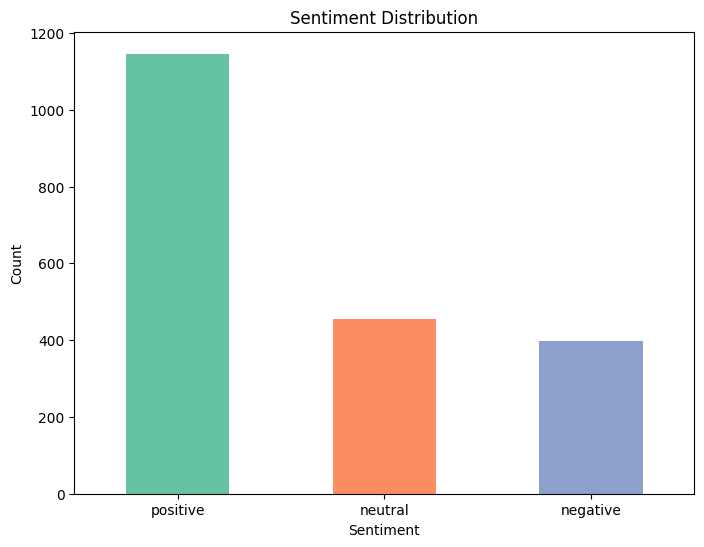

In [61]:

sentiment_counts = sampled_dataset['sentiment'].value_counts()


plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='bar', color=['#66c2a5', '#fc8d62', '#8da0cb'])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()


The destribution suggests most of the sentiment on data is positive where neutral and negative being pretty similar with **50%** of positive sentiments. 

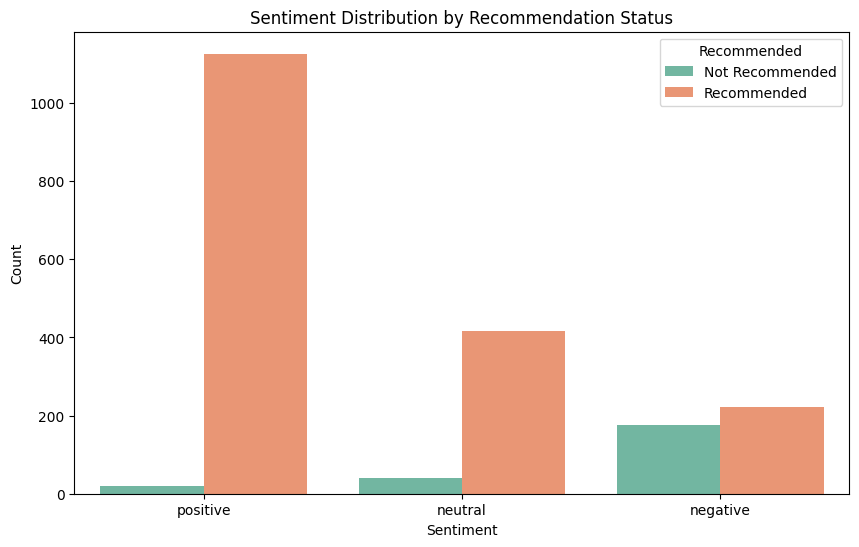

In [62]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6))
sns.countplot(data=sampled_dataset, x='sentiment', hue='recommended', palette='Set2')
plt.title("Sentiment Distribution by Recommendation Status")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.legend(title="Recommended", labels=["Not Recommended", "Recommended"])
plt.show()


The green bar indicates not recommended and orange means recomended. 


**Positive:** 
Following the graph we can see positive sentiment has a good correlation with being recomended. Which aligns with our intuition. 


**Neutal:**
Where neutral is mostly recomended one intuition behind it is some gamers actually put images made with symbols to appreciate that they like. for example ASCII art or text art like this:
       
     ╭(⌐■_■)╮
     
       L  L 

**Negative:**
On the other hand negative sentiment has relatively ore not recomended. but in itseld the recommended and not recommended in pretty close together. the reason is games might feel frustrated on some bugs and hate some particular part of it. and they want to express their frustration on reviews. but in over all case they love the game and feels like its worth a shot. so they still recomend the game


In [63]:
import pandas as pd


pd.set_option('display.max_colwidth', None) 



filtered_reviews = sampled_dataset[
    (sampled_dataset['sentiment'] == 'negative') & 
    (sampled_dataset['recommended'] == True)
]

print("Filtered Reviews (Negative Sentiment and Not Recommended):")
(filtered_reviews[['review']])


Filtered Reviews (Negative Sentiment and Not Recommended):


,review
56,"This game is super fun! Unfortunately, it lacks many basic features of an RTS in the genre. I cannot support it until it is a completed game."
335,"Early entry in steam just nice no cheats, GOOD\nThis game is cool. BUT!!!\nNow there are still some people who use cheats/hacking ilegal program , Ban VAC steam let deterrent effect"
505,外挂属实有点多
643,玩本体的时候：卡普空真特么良心 玩冰原的时候：[spoiler]WCNM[/spoiler]的滕刚要
864,装备检查，一切达标，没有落单，着陆良好，补给拿好，猫饭吃饱，摩拳擦掌，开始起跑。怪物猎人：单刷。是兄弟，就在关键时刻掉线！
902,游戏很棒 WG有点多
911,PUBG是一款成功的游戏。就销量而言。\n我已经玩了800多个小时，这其中有太多的无奈和愤怒。\n曾经和小伙伴们开黑，一起愉快的玩耍。但是久了，我们逐渐地被服务器和掉帧所折磨。\n可我们的热情还是在的，后来又遇到了外挂时期，几乎把把都有挂，于是热情一点点的被消磨。\n游戏点开的越来越少，而今天终于把他些卸载了。\n对于他的新模式和更新也是感到无奈，有些新模式的慢节奏托节奏就很无聊。服务器越更新越差。\n优化并没有看到多少的努力。以及新图那可怜的帧数。\nPUBG注定是一个快餐游戏，PUBG注定是PUBB（对于公共麦的吐槽）
940,土豆服务器真的是牛逼，间接性游戏正常启动，持续性游戏无法启动，我也是醉了，你个steam平台非要和育碧捆绑我是没话说，80块钱体验五个小时真好
1113,"если любите грузиться 30 мин на компе который тянет все игры на ультрах, то игра нормас"
1232,"10 часовая партия закончена, и город кое-как пережил эту зиму. Играя на среднем почувствовал проблемы во время финального обледенения, до этого момента все работало как часы. Чувствуешь себя настоящей сволочью отключая санитарные палатки от отопления, но иначе не продержаться. А еще лучше выглядит пара десятков прихожан на сеансе мазохизма перед генератором ;) \n\n Есть претензии к интерфейсу игры:\n- Чем больше разрастается город, а мой в итоге вырос до 480 человек, тем сложнее разбираться где что стоит. Банальная подсветка однотипных зданий (постов добычи, палаток с едой и т.п.) спасла бы ситуацию.\n- Охотничьи домики работают ночью, но паровые котлы под них нельзя настроить т.е. есть только 24 часа, смены обычные и продленные, а про ночные почему-то забыли. -\n- Крайне неудобно синхронизировать паровые котлы с работающими зданиями. Когда меняешь смену в одном посте, то тебе каждый раз нужно искать паровой котел и прописывать значение смены в нем отдельно. Когда их 3 это небольшая проблема, но ближе к лейту их может быть и 10 и 15.\n- Первый сценарий 9 часов и 46 дней, второй 3 часа и 23 дня?! Выглядит как халтура... Остальное видимо попилено на длц еще за 30$ \n\n Игра на любителя, cлишком мало контента, a реиграбельность практически нулевая."


In [71]:
highest_value = dataset['votes_helpful'].max()
lowest_value = dataset['votes_helpful'].min()
print(lowest_value, highest_value)

0 4398046511106


thats the lowest helpfulness is 0 and on highest helpfullness is 4398046511106. which is really high and exceptional.

In [72]:
# highest_index = dataset['votes_helpful'].idxmax()

# # Get the row with the highest votes_helpful
# highest_row = dataset.loc[highest_index]

# # Display the row
# print("Row with the highest votes_helpful:")
# # print(highest_row)

Row with the highest votes_helpful:
Unnamed: 0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          

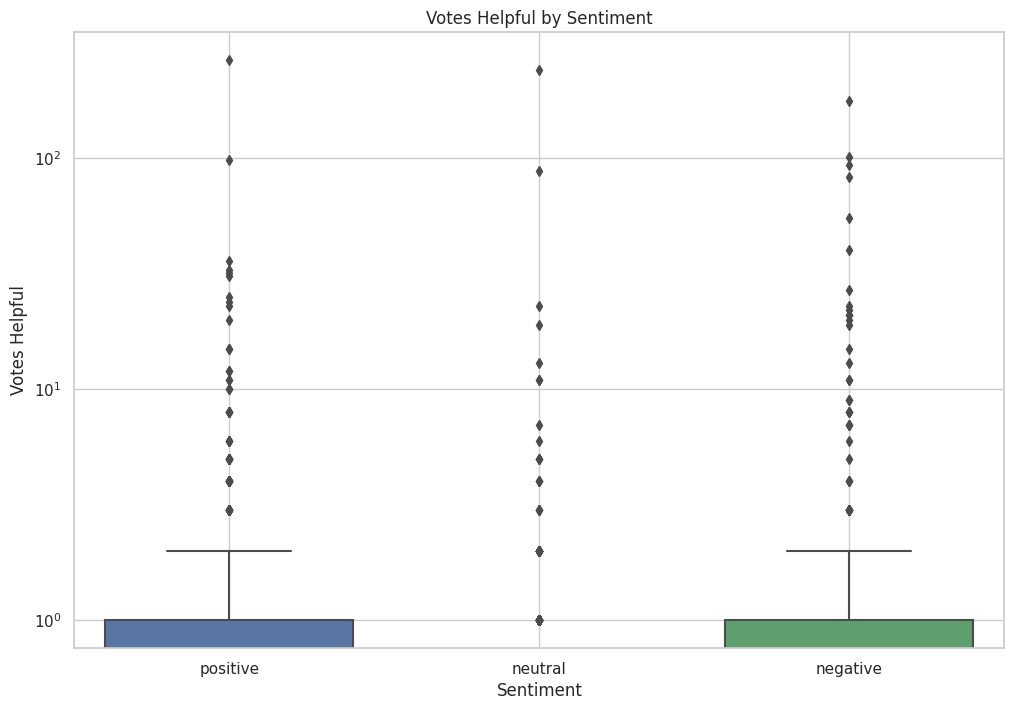

In [79]:

plt.figure(figsize=(12, 8))
sns.boxplot(data=sampled_dataset, x='sentiment', y='votes_helpful')
plt.title('Votes Helpful by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Votes Helpful')
plt.yscale('log')  # Apply log scale to the y-axis to handle large ranges
plt.grid(True)
plt.show()


from the graph it seems like 50% of the reviews only had recived 1 helpfullness vote.  but there are a lot of out liers. one of the reasons of these would be most people would see only the reviews that were already high in count of helpfulness and would be voted again ultimately gaining a monopoli of helpful votes.

on the other hand neutral sentiment doesn't seem to have any 50% showing box. the reason would be most of these images made with usually gets full attention of people because of their crafty skills. 

Found this in review: 


⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⣀⡀⣤⢤⡤⣤⠤⣔⡲⡔⢦⣒⠦⡤⢄⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀ ⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢀⣠⣶⢻⢥⣛⡜⢮⣼⢲⣙⢦⢳⡹⢲⡍⣞⡱⢫⡜⣝⡢⢤⣀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀ ⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⣠⣶⣿⡿⢣⣿⢾⡱⢮⣽⢧⢣⢏⣾⢣⡝⣣⠞⣥⢏⣳⢚⣬⠳⣍⠶⣩⠦⡄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀ ⠀⠀⠀⠀⠀⠀⠀⠀⠀⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⣠⣾⡿⣫⣾⣽⣿⠟⡦⢽⣾⣏⢮⡓⢮⢞⡗⣮⢱⡛⢦⣋⣖⢫⠖⡽⢬⡓⢧⡛⡼⣡⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀ ⠀⠀⠀⠀⠀⠀⡀⠁⠀⠈⡐⠈⠀⠀⠀⠀⠀⢀⣼⣿⡿⣱⣿⣿⣿⢏⡞⣭⣿⣿⢚⢦⣋⠗⣮⣿⣜⡣⣝⢣⡳⢬⡳⣋⢾⡥⢫⠧⣝⢲⢣⡝⣄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀ ⠀⠀⠀⠀⠂⠀⢠⠀⠀⠀⠃⠀⠈⠀⠀⠀⢠⣿⣿⡿⣱⡿⣿⣿⡟⡼⣘⣾⣿⣯⡙⣶⡏⡞⢦⠽⣧⣓⢎⡧⣝⢣⡳⠽⣞⢯⢣⣛⡬⣓⢯⡜⡜⣆⠀⠀⠀⠀⠀⠀⠀⠀⠀ ⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⡆⠀⠀⠀⠀⢠⣿⣿⣿⣳⣿⣿⣎⡻⣸⡱⢻⡟⠁⡧⡝⡏⣷⣙⢮⣙⣿⣎⡷⢞⡬⢧⣙⢧⣋⢿⣷⡘⠶⣍⠾⣝⡼⡸⠄⠀⠀⠀⠀⠀⠀⠀⠀ ⠀⠀⢀⡄⠀⠀⡄⠀⠀⠀⠀⠀⠀⠁⠀⣾⣿⣿⣷⣿⣿⣿⣿⢣⢎⡺⠋⠀⠇⡷⣙⢃⢺⡱⢎⡞⡼⣧⣳⠈⢺⡱⢎⡶⣩⠶⣹⡭⣛⢬⡛⣼⠶⣹⢹⡀⠀⠀⠀⠀⠀⠀⠀ ⢀⠂⠀⠀⠀⠀⠠⠀⠀⠀⡀⠀⠀⠘⣰⣿⣿⢿⣿⣿⠻⣿⡟⡜⢮⠋⠀⠀⠈⡷⣹⠀⢀⢏⠷⣸⡱⢿⣏⡀⠀⠹⣇⡞⣥⢛⡴⣏⠳⣎⡵⢎⣷⢣⢧⢣ ⠀⠀⠀⠁⠀⠀⢃⠀⠀⠀⡇⠀⠀⠀⢹⣿⣿⣿⣿⣿⣷⣄⡙⠭⡇⠀⠁⠄⠀⢱⣹⠀⠀⠨⣯⠵⣩⢛⣯⡇⠀⠀⠙⢜⠶⣩⠶⣩⢗⡣⢞⣱⢚⡧⡞⣭⠀⠀⠀⠀⠀⠀⠀ ⠀⠀⠀⡃⠀⠀⡤⠀⠀⠀⢇⠀⠀⠀⠈⣿⣿⣿⣷⣿⣿⣿⠜⡕⠀⠀⠀⠀⠀⠂⣿⡀⠀⠀⠀⠻⡥⣋⢿⡅⢠⠠⠂⠈⢛⠦⣏⠵⣪⠝⣮⣱⢋⣷⣙⠖⣆⠀⠀⠀⠀⠀⠀ ⠀⠀⠀⡇⠀⠀⠸⠂⠀⠀⠉⠀⠀⠀⠀⢼⣿⣿⣾⣿⣿⣿⡞⡇⠀⠀⢀⣀⣤⣄⠸⡌⠀⠀⠀⠀⠘⢭⢖⣇⠀⣀⣠⣀⡈⠳⣎⢻⡥⣛⣼⡣⢏⣼⣹⡞⣱⣄⠀⠀⠀⠀⠀ ⠀⠀⠐⠰⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢀⠸⣿⣿⣿⣿⣿⣷⡿⠀⢠⣾⠟⢋⣭⣟⣆⠁⠀⠀⠀⠀⠀⠀⠙⢼⢰⣟⣯⣛⠻⢷⣽⣙⡶⢣⣾⣏⠳⣼⡇⣟⡴⢫⢦⠀⠀⠀⠀      . ⠁⠀⠉⠿⠿⢿⣿⣻⣿⡇⡿⠁⢠⣿⣽⣤⣦⠀⠀⠀⠀⠀⠀⠀⠀ ⢸⣿⣿⣧⣧⠈⣿⠙⣽⢣⣿⣿⡳⣜⠯⣵⢺⡟⠚⢵⢠⡀⠀ ⠀⠀⠀⠀⠀⠀⠀⢀⠠⠀⠀⠀⠀⠃⢀⠀⠀⠀⠀⢹⣿⣿⣷⠀⠘⠅⢸⣿⣿⢿⣿⠀⠀⠀⠀⠀⠀⠀⠀⠀⢺⣿⣿⣿⡿⠀⠏⠰⣹⢾⡟⢿⣿⣎⡟⡼⣇⢿⠀⠀⠀⠉⠉ ⠀⠀⠀⠀⡀⠄⠀⠀⠀⠀⠀⡀⢀⢀⠐⠀⠀⠀⠀⣼⡿⣸⢻⣧⠀⠀⠂⡣⣦⠾⠇⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠾⠴⠾⠁⠀⠀⠀⡝⣾⢭⢻⣿⡜⣣⣝⡷⣊⡇⠀⠀⠀⠀ ⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠐⠀⠐⠁⠰⠀⠀⠀⢀⣿⡱⢣⢏⡞⣣⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⡟⡧⢎⡳⣿⠼⡱⢎⡷⣩⢶⠀⠀⠀⠀ ⠀⠀⠀⠀⠀⠀⠀⠀⠀⠠⠀⠀⠀⠀⠀⠀⠀⠀⢸⣷⢭⡓⡞⡼⣕⠇⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⡟⣗⡫⣕⣻⢭⠳⣭⣿⣱⢺⠀⠀⠀⠀ ⠀⠀⠀⠀⠀⠀⠀⠀⠀⠁⠀⠀⠀⠀⠀⠀⠀⠀⣸⣿⣷⣯⣼⣵⢎⢷⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢠⣵⣿⣇⡗⣎⢾⣍⠳⣖⣿⡧⢻⠀⠀⠀⠀ ⠀⢢⠀⠀⠀⠀⠀⠀⢠⠀⠀⠀⠀⠀⠀⠀⠀⢰⣿⣿⣿⣿⣿⣿⣿⣷⣞⣢⠀⠀⠀⠀⠀⠀⠔⠀⠐⠀⠀⠀⠀⠀⠀⠀⠀⢠⣾⣿⣿⡗⡼⣊⢶⢪⢽⣞⣿⣓⣻⠀⠀⠀⠀ ⠀⠀⠣⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠐⣹⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣇⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢀⣴⣿⣿⣟⣿⣱⠳⣍⢮⡓⢾⣿⡿⣒⠇⠀⠀⠀⠀ ⠀⠀⢠⣆⠀⠀⠀⠀⠀⠀⠀⢀⡀⢀⠀⠔⠁⣽⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣟⣀⢄⠀⠀⠀⠀⠀⠀⠀⠀⢀⢀⣴⣶⣿⣿⡿⣿⣿⣿⢔⡻⣜⢲⡙⢾⠟⢧⣹⠀⠀⠀⠀⠀ ⠀⠀⠸⣿⡇⠤⠭⠀⠀⠁⠉⠁⠀⠀⠀⢀⣼⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣮⠒⢁⠀⠄⠀⢠⠐⠀⠀⢿⣿⣿⢿⡿⠁⣿⣿⣏⠮⣕⢎⢧⡻⡏⠀⢮⠁⠀⠀⠀⠀⠀ ⠀⠀⠀⢹⣿⡀⠐⡀⠀⠀⠀⠀⠀⠀⣠⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣧⡀⠐⠤⠀⠁⠀⠀⠱⠈⣿⣿⡟⠁⠀⣹⣿⢥⡛⡜⣎⢾⢳⠀⠀⠁⠀⠀⠀⠀⠀⠀ ⠀⠀⠀⠀⣿⣿⠀⠣⠀⠀⠀⠀⢀⣴⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣧⠀⠀⠀⠀⣈⠔⠀⢠⣿⣿⣿⣦⠀⣿⡟⢦⣹⠕⠁⣸⠃⠀⠀⠀⠀⠀⠀⠀⠀⠀ ⠀⠀⠀⠀⢹⣿⡀⠀⠈⠠⢀⢀⣾⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣧⠀⣠⣆⠥⡀⠀⢸⣿⣿⣿⣿⣿⣤⠛⠊⠀⠀⠀⠁⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀ ⠀⠀⠀⠀⠀⣿⣷⡀⠀⠀⢀⣾⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣆⠏⡖⡡⢯⡢⡌⣿⣿⣿⣿⣿⣿⣷⣄⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀ ⠀⠀⠀⠀⠀⠘⣿⣿⣶⣴⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⠇⡼⡁⣿⡄⣷⡹⣿⣿⣿⣿⣿⣿⣿⣿⣿⣶⣄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀ ⠀⠀⠀⠀⠀⠀⠻⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⠐⣻⠐⣿⣿⡌⢷⡘⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣷⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀ ⠀⠀⠀⠀⠀⠀⠀⠻⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⢨⡇⠎⡿⡿⣗⢨⢁⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⡷⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀ ⠀⠀⠀⠀⠀⠀⠀⠀⠈⠙⠿⠿⠿⠿⠿⠿⠻⠟⠿⠟⠿⠟⠿⠿⠻⠿⠟⠿⠿⠻⠿⠟⠿⠿⠇⠘⠤⠇⠏⠜⠆⠣⠿⠻⠟⠿⠻⠟⠿⠻⠟⠿⠇